<a href="https://colab.research.google.com/github/simonacarusooo/Football-Analytics/blob/main/Dribbling_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
import warnings as wr
wr.filterwarnings('ignore')
df = pd.read_csv("/content/take_on.csv")
df_team = pd.read_csv("/content/team_id_names.csv.csv")

# Data exploration

In [61]:
df.head()

,Unnamed: 0,game_id,player_id,team_id,outcome,x,y,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5
0,0,2367538,58621,43,0,45.4,3.6,0.000000,0.0,0.002587,NaN,0.0,0.0,0.000227,NaN
1,1,2367538,58621,43,0,61.6,12.1,0.021269,0.0,0.039709,NaN,0.0,0.0,0.039709,NaN
2,2,2367538,58621,43,0,12.5,30.8,0.021269,0.0,0.039709,NaN,0.0,0.0,0.039709,NaN
3,3,2367538,91651,43,0,39.6,68.6,0.000000,0.0,0.012614,NaN,0.0,0.0,0.001590,NaN
4,4,2367538,91651,43,1,53.4,59.4,0.000000,0.0,0.012614,NaN,0.0,0.0,0.012614,NaN


In [62]:
df_team.head()

,team_id,team,team_name_short,team_name_symbol,competition_id,competition
0,1,Manchester United,Man Utd,MUN,8,Premier League
1,2,Leeds United,Leeds,LEE,10,Championship
2,3,Arsenal,Arsenal,ARS,8,Premier League
3,4,Newcastle United,Newcastle,NEW,8,Premier League
4,5,Blackburn Rovers,Blackburn,BLB,10,Championship


In [63]:
df = df.merge(df_team[["team_id", "team"]],on=["team_id"])
df.head()

,Unnamed: 0,game_id,player_id,team_id,outcome,x,y,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5,team
0,0,2367538,58621,43,0,45.4,3.6,0.000000,0.0,0.002587,NaN,0.0,0.0,0.000227,NaN,Manchester City
1,1,2367538,58621,43,0,61.6,12.1,0.021269,0.0,0.039709,NaN,0.0,0.0,0.039709,NaN,Manchester City
2,2,2367538,58621,43,0,12.5,30.8,0.021269,0.0,0.039709,NaN,0.0,0.0,0.039709,NaN,Manchester City
3,3,2367538,91651,43,0,39.6,68.6,0.000000,0.0,0.012614,NaN,0.0,0.0,0.001590,NaN,Manchester City
4,4,2367538,91651,43,1,53.4,59.4,0.000000,0.0,0.012614,NaN,0.0,0.0,0.012614,NaN,Manchester City


Dataset Description:
1. **Unnamed: 0** : observation number
1.   **game_id** : identifiction number associated to the match
2.   **player_id** : identification number of the player
3.  **team_id** : identification number of the team
4. **outcome** : 1 if the dribbling is successful, 0 otherwise
5. **x** : x-coordinate of the player on the field
6. **y** : y-coordinate of the player on the field
7. **xG_10** : expected goal value after 10 touches
8. **xGA_10** : expected goal value after 10 touches for the opposite team
9. **xT_10** : excepted threat value after 10 touches
10. **xTA_10** : excepted threat value after 10 touches for the opposite team
11. **xG_5** : expected goal value after 5 touches
12. **xGA_5** : expected goal value after 5 touches for the opposite team
13. **xT_5** : excepted threat value after 5 touches
14. **xTA_5** : excepted threat value after 5 touches for the opposite team
15. **team** : team name

In [64]:
#deletion of the first column and fourth column of the dataset
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('team_id', axis=1)

#replacement of NaN with 0
df.fillna(0, inplace=True)

#transformation of game_id, player_id and team_id into categrical
df[['game_id','player_id', 'team']] = df[['game_id','player_id', 'team']].astype('category')

In [65]:
df.nunique()

game_id       830
player_id    1317
outcome         2
x             965
y             980
xG_10        4794
xGA_10        297
xT_10        6365
xTA_10       1918
xG_5         3089
xGA_5         106
xT_5         6453
xTA_5        1211
team           58
dtype: int64

In [66]:
len(df)

29104

The df has 29104 observations, but the number of unique observations for the continuous variables is much lower. We can see that the values of these variables are concentrated around 0!

In [67]:
df.describe()

,outcome,x,y,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5
count,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000,29104.000000
mean,0.425027,62.441609,51.387156,0.029187,0.001829,0.008019,0.000536,0.016286,0.000614,0.004425,0.000153
std,0.494356,22.015907,32.244009,0.102280,0.026584,0.022187,0.005868,0.074435,0.015736,0.017384,0.003016
min,0.000000,0.700000,0.800000,0.000000,0.000000,-0.073017,-0.038877,0.000000,0.000000,-0.106328,-0.062477
25%,0.000000,44.000000,18.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,66.600000,54.000000,0.000000,0.000000,0.002433,0.000000,0.000000,0.000000,0.000353,0.000000
75%,1.000000,79.900000,83.300000,0.000000,0.000000,0.006436,0.000000,0.000000,0.000000,0.003442,0.000000
max,1.000000,99.200000,99.600000,1.441882,1.003664,0.289941,0.256240,1.277284,1.003664,0.289941,0.224331


# Feature engineering

## Grouping data and basic information

A first approach is to group information for each team and considering the mean value for each variable.

In [69]:
df_grouped = df.groupby("team")[["outcome","x","xG_10",	"xGA_10", "xT_10",	"xTA_10",	"xG_5",	"xGA_5",	"xT_5",	"xTA_5"]].mean().reset_index()
df_grouped

,team,outcome,x,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5
0,1. FC Heidenheim 1846,0.383863,61.646210,0.017347,0.004845,0.005227,0.000550,0.011430,0.001966,0.002472,4.085477e-05
1,1. FC Köln,0.463476,59.361209,0.016301,0.003303,0.005140,0.000574,0.007713,0.000000,0.002828,1.137146e-04
2,1. FC Union Berlin,0.389831,62.276836,0.030735,0.000716,0.005794,0.000293,0.018031,0.000098,0.003426,1.491240e-04
3,1. FSV Mainz 05,0.410377,64.330896,0.021040,0.002081,0.007966,0.000652,0.012073,0.001172,0.003799,3.854981e-04
4,Arsenal,0.394687,69.908159,0.031379,0.001238,0.010081,0.000302,0.021275,0.000031,0.005656,1.011564e-04
5,Aston Villa,0.441935,58.521129,0.029367,0.002889,0.009945,0.001074,0.012955,0.000750,0.006164,3.632748e-04
6,Atalanta,0.432927,64.497561,0.035122,0.000756,0.009014,0.000500,0.017821,0.000073,0.005178,2.596415e-04
7,Bayer 04 Leverkusen,0.469466,67.279008,0.044125,0.001374,0.010368,0.000312,0.026425,0.000081,0.006091,1.070229e-05
8,Bologna,0.404762,62.459864,0.029266,0.000485,0.006499,0.000225,0.019848,0.000000,0.003543,7.352381e-05
9,Borussia Dortmund,0.411978,65.427586,0.032548,0.000953,0.009259,0.000781,0.020668,0.000000,0.004963,5.187623e-05


In [43]:
df_grouped.describe()

,outcome,x,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.423095,62.305924,0.028766,0.001872,0.007924,0.000543,0.016080,0.000657,0.004379,0.000154
std,0.032810,2.504019,0.008708,0.001687,0.002138,0.000337,0.004977,0.000987,0.001426,0.000154
min,0.364542,57.797614,0.015822,0.000036,0.004702,0.000096,0.007331,0.000000,0.002141,-0.000023
25%,0.404957,60.757748,0.023492,0.000726,0.006059,0.000314,0.013021,0.000041,0.003369,0.000047
50%,0.419219,61.889952,0.027498,0.001327,0.007599,0.000455,0.014983,0.000249,0.004164,0.000112
75%,0.442371,64.029897,0.033732,0.002767,0.009885,0.000678,0.019320,0.000863,0.005396,0.000224
max,0.509168,69.908159,0.054732,0.007978,0.012979,0.001727,0.032655,0.004767,0.007694,0.000667




---

Graphical infos

In [70]:
#average danger level per team after 10 touches
fig1 = px.scatter(df_grouped, x="xG_10", y="xT_10", text="team", color = "team", title = "Scatterplot of the average xG_10 and xT_10 for each team")
fig1.update_traces(textposition='top center')
fig1.show()

In [71]:
#comparison between the average threat we create after 10 touches and the average threat created by the opposite teams
fig2 = px.scatter(df_grouped, x="xT_10", y="xTA_10", text = "team", color ="team",  title = "Scatterplot of the average xT_10 and xTA_10 for each team")
fig2.update_traces(textposition='top center')
fig2.show()

From the corrplot we can see:
1. The variable **outcome** is mildly related to the expected goals and expected threat variables
2. Expected goals and expected threat variables are related
3. Single variables considered after 5 and 10 touches are strongly related

We have to handle data to avoid redundancy and to obtain hidden information

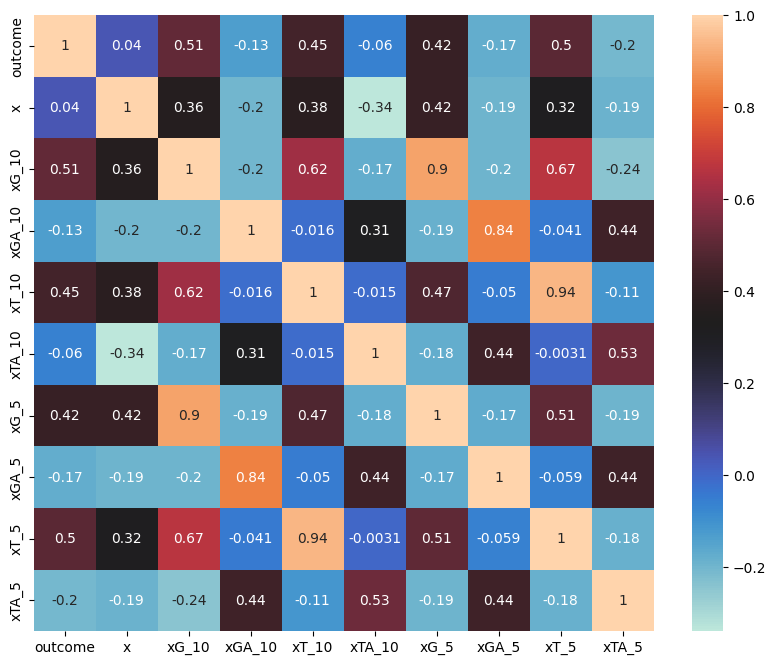

In [72]:
df_grouped = df_grouped.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_grouped_num.corr(), annot=True, cmap='icefire')
plt.show()

## Handling data and new variables creation

In [73]:
#creation of a function to identify the position in the field on the basis of the x-coordinate
def position(x):
    if x <= 33.33:
        return 'defense'
    elif x <= 66.67:
        return 'midfield'
    else:
        return 'attack'

In [74]:
#creation of the "position" variable applied to the original dataset
df['position'] = df['x'].apply(position)

In [75]:
#creation variables in order to check whether the threat is continuing after the 5th touch
df['diff_xT_10_5'] = df['xT_10'] - df['xT_5'] #<0 not persistent, >0 persistent
df['persistent_threat'] = np.where(df['diff_xT_10_5'] > 0, 1, 0) #0 = not persistent, 1 = persistent

#creation variables in order to check whether the threat is continuing after the 5th touch
df['diff_xG_10_5'] = df['xG_10'] - df['xG_5'] #<0 not persistent, >0 persistent
df['persistent_goal'] = np.where(df['diff_xG_10_5'] > 0, 1, 0) #0 = not persistent, 1 = persistent

#we consider just the binary version of the variables
columns_to_drop = ['diff_xG_10_5','diff_xT_10_5' ]
df = df.drop(columns=columns_to_drop)

In [76]:
df.head()

,game_id,player_id,outcome,x,y,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5,team,position,persistent_threat,persistent_goal
0,2367538,58621,0,45.4,3.6,0.000000,0.0,0.002587,0.0,0.0,0.0,0.000227,0.0,Manchester City,midfield,1,0
1,2367538,58621,0,61.6,12.1,0.021269,0.0,0.039709,0.0,0.0,0.0,0.039709,0.0,Manchester City,midfield,0,1
2,2367538,58621,0,12.5,30.8,0.021269,0.0,0.039709,0.0,0.0,0.0,0.039709,0.0,Manchester City,defense,0,1
3,2367538,91651,0,39.6,68.6,0.000000,0.0,0.012614,0.0,0.0,0.0,0.001590,0.0,Manchester City,midfield,1,0
4,2367538,91651,1,53.4,59.4,0.000000,0.0,0.012614,0.0,0.0,0.0,0.012614,0.0,Manchester City,midfield,0,0




---
On the basis of this new version of the dataframe, we group infos in order to have average values by team, position and outcome.

We group by position because we expcept higher values of xG in case of position == attack or higher values for xGA in case of position == defense.

We group by outcome because we except higher values of persistent threat and goal in case of outcome == 1.

Note that now the binary variables **persistent_goals** and **peristent_threat** are ranged between 0 and 1. If their value is around 1, then for the specific team, given the outcome and the position, the danger in terms of goal and threat is going on on average.



In [77]:
df_grouped = df.groupby(["team", "outcome", "position"])[["x","xG_10",	"xGA_10", "xT_10",	"xTA_10",	"xG_5",	"xGA_5",	"xT_5",	"xTA_5", "persistent_goal", "persistent_threat"]].mean().reset_index()
df_grouped.head(12)

,team,outcome,position,x,xG_10,xGA_10,xT_10,xTA_10,xG_5,xGA_5,xT_5,xTA_5,persistent_goal,persistent_threat
0,1. FC Heidenheim 1846,0,attack,80.728455,0.023077,0.000000,0.004888,0.000254,0.016841,0.000000,0.001576,0.000070,0.081301,0.430894
1,1. FC Heidenheim 1846,0,defense,23.604167,0.006949,0.014901,0.005583,0.000446,0.002649,0.001451,0.003818,0.000139,0.041667,0.333333
2,1. FC Heidenheim 1846,0,midfield,52.725714,0.011563,0.008130,0.002906,0.000700,0.005154,0.003909,0.001694,0.000072,0.076190,0.342857
3,1. FC Heidenheim 1846,1,attack,78.427869,0.011010,0.005884,0.003992,0.000023,0.011010,0.000000,0.001467,-0.000015,0.000000,0.459016
4,1. FC Heidenheim 1846,1,defense,25.720833,0.003151,0.000000,0.004054,0.000017,0.003151,0.000000,0.002068,-0.000075,0.000000,0.375000
5,1. FC Heidenheim 1846,1,midfield,52.494444,0.029557,0.005717,0.010511,0.001493,0.017378,0.004985,0.005677,0.000000,0.138889,0.319444
6,1. FC Köln,0,attack,79.792784,0.020224,0.001026,0.003703,0.000518,0.008424,0.000000,0.002483,0.000178,0.113402,0.360825
7,1. FC Köln,0,defense,25.916667,0.010568,0.000000,0.005278,0.000264,0.005614,0.000000,0.004400,-0.000034,0.083333,0.375000
8,1. FC Köln,0,midfield,51.707609,0.010621,0.008793,0.005945,0.001140,0.005937,0.000000,0.002911,0.000262,0.108696,0.347826
9,1. FC Köln,1,attack,80.154545,0.021439,0.006106,0.006903,0.000541,0.014678,0.000000,0.003056,0.000080,0.090909,0.393939


In [78]:
# Creazione dell'istogramma per persistent_goal distinto per outcome
fig3 = px.histogram(df_grouped, x="persistent_goal", color="outcome",
                   nbins=10, barmode="group",
                   title="Histogram of Persistent Goal by Outcome",
                   labels={"persistent_goal": "Persistent Goal", "outcome": "Outcome"})
fig3.show()

# Creazione dell'istogramma per persistent_threat distinto per outcome
fig4 = px.histogram(df_grouped, x="persistent_threat", color="outcome",
                   nbins=10, barmode="group",
                   title="Histogram of Persistent Threat by Outcome",
                   labels={"persistent_threat": "Persistent Threat", "outcome": "Outcome"})
fig4.show()



---


Now we create the following variables:
1. **diff_xT_10** : it's given by the difference of the average threat of the team and the average threat we suffer after 10 touches
2.  **diff_xT_5** : it's given by the difference of the average threat of the team and the average threat we suffer after 5 touches
3. **diff_xG_10** : it's given by the difference of the average of expected goals of the team and the average of exptected goals we suffer after 10 touches
4. **diff_xG_5** : it's given by the difference of the average of expected goals of the team and the average of exptected goals we suffer after 5 touches

High values for these variables can be interpreted as an indication of our prevalence over the opposite teams.

In [79]:
df_grouped["diff_xT_10"] = df_grouped["xT_10"] - df_grouped["xTA_10"]
df_grouped["diff_xT_5"] = df_grouped["xT_5"] - df_grouped["xTA_5"]
df_grouped["diff_xG_10"] = df_grouped["xG_10"] - df_grouped["xGA_10"]
df_grouped["diff_xG_5"] = df_grouped["xG_5"] - df_grouped["xGA_5"]

In [82]:
fig5 = px.scatter(df_grouped, y="position", x="diff_xT_10", color="team", symbol="outcome")
fig5.update_traces(marker_size=10)
fig5.show()

fig6 = px.scatter(df_grouped, y="position", x="diff_xT_5", color="team", symbol="outcome")
fig6.update_traces(marker_size=10)
fig6.show()

fig7 = px.scatter(df_grouped, y="position", x="diff_xG_10", color="team", symbol="outcome")
fig7.update_traces(marker_size=10)
fig7.show()

fig8 = px.scatter(df_grouped, y="position", x="diff_xG_5", color="team", symbol="outcome")
fig8.update_traces(marker_size=10)
fig8.show()


In [83]:
len(df_grouped.columns)

18

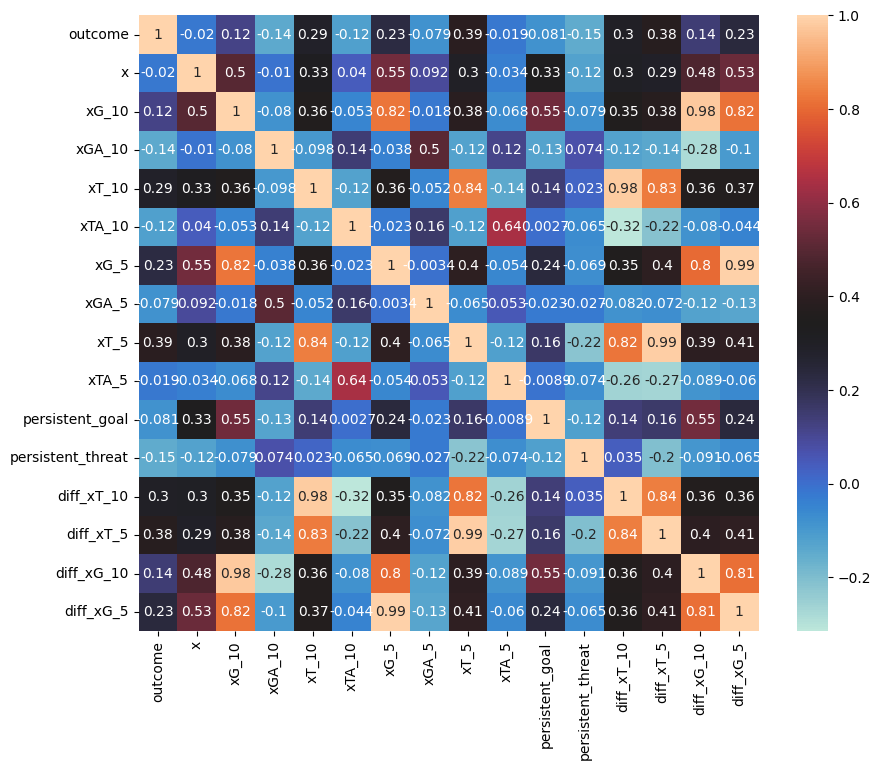

In [84]:
df_grouped_num = df_grouped.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_grouped_num.corr(), annot=True, cmap='icefire')
plt.show()

## Data merging and variable selection

In [85]:
data=df.merge(df_grouped[["team", "position", "outcome","diff_xT_10","diff_xT_5","diff_xG_10","diff_xG_5"]],on=["team", "position", "outcome"])

In [86]:
data.head()

,game_id,player_id,outcome,x,y,xG_10,xGA_10,xT_10,xTA_10,xG_5,...,xT_5,xTA_5,team,position,persistent_threat,persistent_goal,diff_xT_10,diff_xT_5,diff_xG_10,diff_xG_5
0,2367538,58621,0,45.4,3.6,0.000000,0.0,0.002587,0.0,0.0,...,0.000227,0.0,Manchester City,midfield,1,0,0.007187,0.003919,0.029357,0.018381
1,2367538,58621,0,61.6,12.1,0.021269,0.0,0.039709,0.0,0.0,...,0.039709,0.0,Manchester City,midfield,0,1,0.007187,0.003919,0.029357,0.018381
2,2367538,91651,0,39.6,68.6,0.000000,0.0,0.012614,0.0,0.0,...,0.001590,0.0,Manchester City,midfield,1,0,0.007187,0.003919,0.029357,0.018381
3,2367538,91651,0,63.9,51.3,0.000000,0.0,0.012614,0.0,0.0,...,0.012614,0.0,Manchester City,midfield,0,0,0.007187,0.003919,0.029357,0.018381
4,2367538,209244,0,41.5,88.7,0.000000,0.0,0.009870,0.0,0.0,...,-0.003765,0.0,Manchester City,midfield,1,0,0.007187,0.003919,0.029357,0.018381


In [87]:
#creation of dummies related to the position in order to execute the models
data = pd.get_dummies(data, columns=['position'], drop_first=True)

In [88]:
#selection of variables of interest
data = data [['outcome', 'persistent_threat', 'persistent_goal', 'diff_xT_10', 'diff_xT_5',
       'diff_xG_10', 'diff_xG_5', 'position_defense', 'position_midfield']]

In [89]:
data.head(10)

,outcome,persistent_threat,persistent_goal,diff_xT_10,diff_xT_5,diff_xG_10,diff_xG_5,position_defense,position_midfield
0,0,1,0,0.007187,0.003919,0.029357,0.018381,False,True
1,0,0,1,0.007187,0.003919,0.029357,0.018381,False,True
2,0,1,0,0.007187,0.003919,0.029357,0.018381,False,True
3,0,0,0,0.007187,0.003919,0.029357,0.018381,False,True
4,0,1,0,0.007187,0.003919,0.029357,0.018381,False,True
5,0,0,0,0.007187,0.003919,0.029357,0.018381,False,True
6,0,1,0,0.007187,0.003919,0.029357,0.018381,False,True
7,0,1,0,0.007187,0.003919,0.029357,0.018381,False,True
8,0,0,0,0.007187,0.003919,0.029357,0.018381,False,True
9,0,0,0,0.007187,0.003919,0.029357,0.018381,False,True


# Models and Classification results

In [90]:
#Training-Test splitting

from sklearn.model_selection import train_test_split

X = data[['persistent_goal', 'persistent_threat', 'diff_xT_10', 'diff_xT_5', 'diff_xG_10', 'diff_xG_5','position_midfield', 'position_defense']]
y = data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Model initialization
logistic_regression_model = LogisticRegression()

# Fitting the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Predicting the target variable on the testing data
y_pred = logistic_regression_model.predict(X_test)

# Cross-validation
cv_scores = cross_val_score(logistic_regression_model, X, y, cv=5)

# Printing cross-validation results
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", cv_scores.mean())

# Printing accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross Validation Scores: [0.65006013 0.67685965 0.55162343 0.72685106 0.69123711]
Average Cross Validation Score: 0.6593262751112661

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.75      3338
           1       0.68      0.37      0.48      2483

    accuracy                           0.66      5821
   macro avg       0.67      0.62      0.61      5821
weighted avg       0.66      0.66      0.63      5821



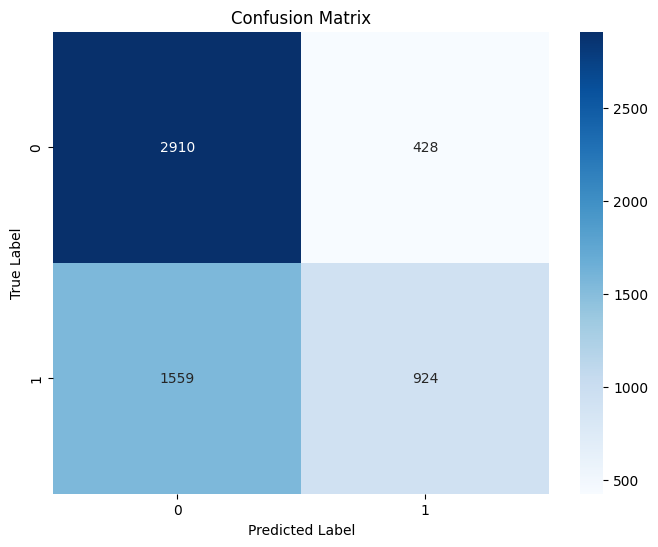

In [93]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## MLP Classifier

In [95]:
from sklearn.neural_network import MLPClassifier

# Initialize Multi-layer Perceptron (Neural Network) classifier model
mlp_classifier = MLPClassifier()

# Perform cross-validation
cv_scores = cross_val_score(mlp_classifier, X_train, y_train, cv=5)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross Validation Scores: [0.79321452 0.79922697 0.78634314 0.78457904 0.79789519]
Average Cross Validation Score: 0.7922517704198756

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3338
           1       0.81      0.65      0.72      2483

    accuracy                           0.79      5821
   macro avg       0.79      0.77      0.78      5821
weighted avg       0.79      0.79      0.78      5821



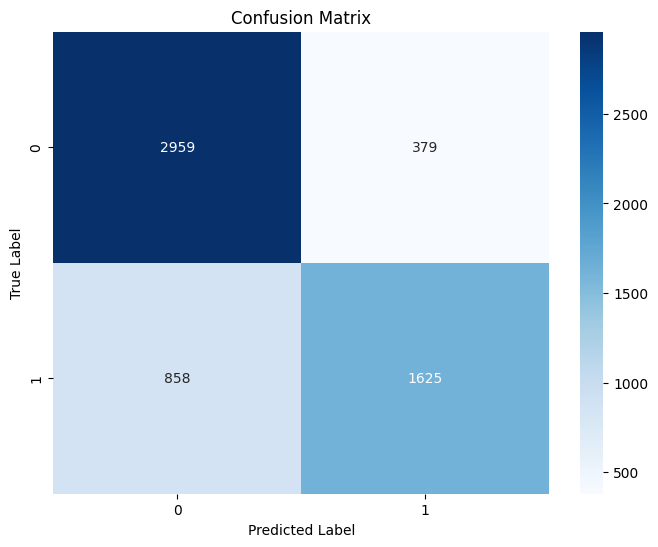

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Classification trees


In [97]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier model
decision_tree_classifier = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=5)

# Train the model
decision_tree_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross Validation Scores: [1. 1. 1. 1. 1.]
Average Cross Validation Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00      2483

    accuracy                           1.00      5821
   macro avg       1.00      1.00      1.00      5821
weighted avg       1.00      1.00      1.00      5821



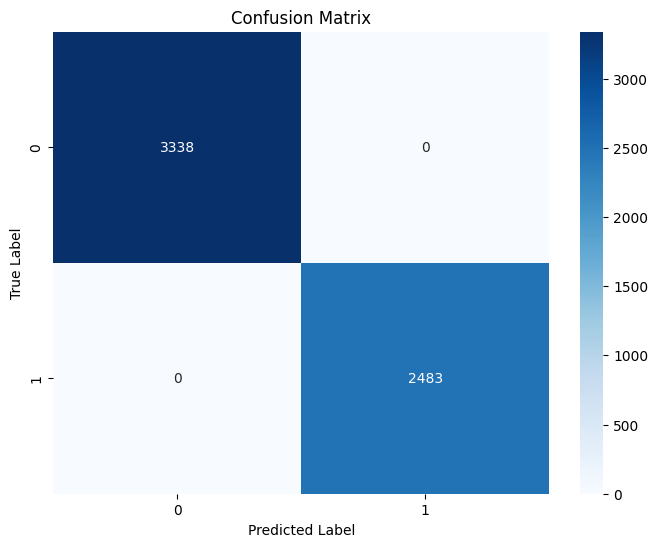

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forests

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier model
random_forest = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5)  # You can adjust cv value as needed

# Train the model
random_forest.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross Validation Scores: [1. 1. 1. 1. 1.]
Average Cross Validation Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00      2483

    accuracy                           1.00      5821
   macro avg       1.00      1.00      1.00      5821
weighted avg       1.00      1.00      1.00      5821



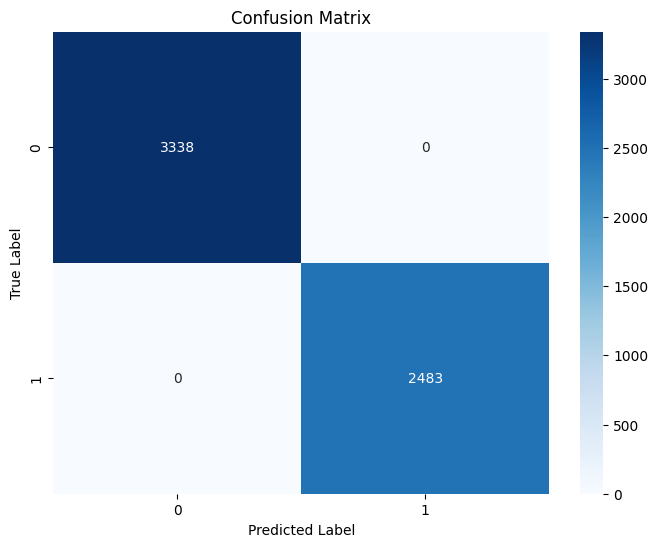

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()